/var/folders/m6/mgjfjp2s2b97v0p3wmv8x69m0000gn/T/ipykernel_49821/871924349.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('GBPUSD=X', period='5y', interval='1d')
[*********************100%***********************]  1 of 1 completed
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/snowyan/PycharmProjects/JupyterProject/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning

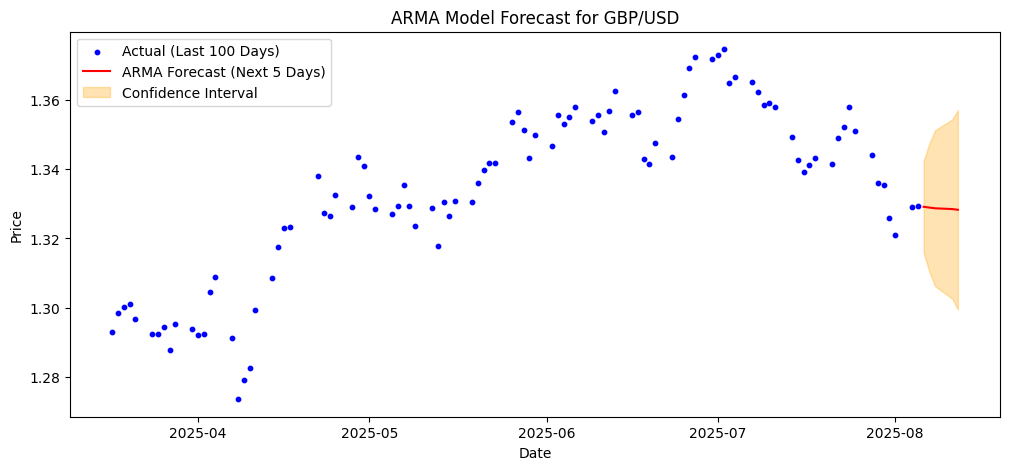

In [3]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Download 5 years of GBP/USD daily data
data = yf.download('GBPUSD=X', period='5y', interval='1d')
prices = data['Close'].dropna()

# Fit ARMA model (ARMA is ARIMA with d=0)
model = ARIMA(prices, order=(2, 0, 2))
model_fit = model.fit()

# Forecast the next 5 days with confidence intervals
forecast_res = model_fit.get_forecast(steps=5)
forecast = forecast_res.predicted_mean
conf_int = forecast_res.conf_int()

# Plot actual prices (scatter), ARMA forecast (line), and confidence interval (color)
plt.figure(figsize=(12, 5))
plt.scatter(prices.index[-100:], prices.values[-100:], label='Actual (Last 100 Days)', color='blue', s=10)
plt.plot(prices.index[-1:], prices.values[-1:], color='blue')  # Connect last actual to forecast

# Forecast indices
forecast_indices = pd.date_range(prices.index[-1], periods=6, freq='B')[1:]

plt.plot(forecast_indices, forecast, label='ARMA Forecast (Next 5 Days)', color='red')
plt.fill_between(forecast_indices, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3, label='Confidence Interval')

plt.title('ARMA Model Forecast for GBP/USD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()